

### 1. We are given four data points $(-1,1),(0,1),(1,2),(2,3)$ from a function $f(x)$ and want to find an interpolant in Newton form. Instead of using divided differences, we want to construct the interpolating equation system as on Slide 12 of Chapter10 and solve for the coefficients $c$.

**(a)** (3 points) Write the matrix A in Python for the four points provided for the interpolating problem $Ac = y$. Solve for c with <tt>numpy.linalg.solve</tt>. Write down the polynomial interpolant $p(x)$ in Newton form.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array((-1,0,1,2))
y = np.array((1,1,2,3))

# construct matrix A
# hint: start with zeros and fill it in, A = np.zeros((n,n))
A = np.zeros((4,4))
A[:,0] = [1,1,1,1]
A[:,1] = [0,1,2,3]
A[:,2] = [0,0,2,6]
A[:,3] = [0,0,0,6]
# solve for c
c = np.linalg.solve(A, y)
print(c)

[ 1.          0.          0.5        -0.16666667]


The resulting interpolant in Newton form is: $p(x) = 1 + 0.5(x+1)(x) - 0.1666(x+1)(x)(x-1)$

**(b)** (2 points) We now got two additional points $(3,4), (4,1)$ for the function $f$. Make another matrix $A_2$ reusing the previous matrix $A$ and solve for $c_2$ for a new Newton polynomial $p_2(x)$. Write down the Newton form of $p_2(x)$.

In [2]:
x2 = np.array((-1,0,1,2,3,4))
y2 = np.array((1,1,2,3,4,1))

# construct A2 from A and the additional info
L = [[1,4,12,24],[1,5,20,60]]
A_2 = np.vstack([A,L])
H = np.zeros((6,2))
H[:,0] = [0,0,0,0,24,120]
H[:,1] = [0,0,0,0,0,120]
A_2 = np.hstack([A_2,H])
# solve for c2
print(A_2)
c2 = np.linalg.solve(A_2, y2)
print(c2)

[[  1.   0.   0.   0.   0.   0.]
 [  1.   1.   0.   0.   0.   0.]
 [  1.   2.   2.   0.   0.   0.]
 [  1.   3.   6.   6.   0.   0.]
 [  1.   4.  12.  24.  24.   0.]
 [  1.   5.  20.  60. 120. 120.]]
[ 1.00000000e+00 -3.55271368e-16  5.00000000e-01 -1.66666667e-01
  4.16666667e-02 -4.16666667e-02]


The resulting interpolant in Newton form is: 
$p_2(x) = 1 - 3.55\times 10^{-16}(x+1) + 5.00\times 10^{-1}(x+1)(x) - 1.66\times 10^{-1}(x+1)(x)(x-1) + 4.16\times^{-2}(x+1)(x)(x-1)(x-2) - 4.167\times 10^{-2}(x+1)(x)(x-1)(x-2)(x-3)$

**(c)** (3 points) Define a Newton interpolator function that takes coefficients $c$, abscissae $x$ and evaluation points $x_{eval}$ as input and returns the function values $y$. Plot the data points and both interpolants $p(x)$ and $p_2(x)$ from before in a figure. Use at least 100 evaluation points to get smooth curves. Add a legend to identify $p$ and $p_2$.

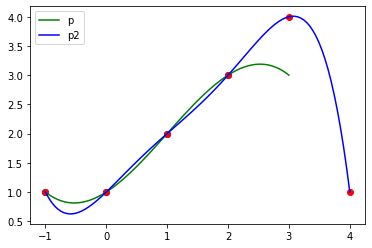

In [3]:
def newton(c,x,x_eval):
    # your code for y
    y = np.zeros(x_eval.size)
    term = np.zeros(x_eval.size) + 1
    for i in range(0, x.size):
        y += c[i]*term
        term = (x_eval - x[i])*term
    return y

# make a plot
x_eval = np.linspace(-1, 4,100)
x_eval_1 = np.linspace(-1,3,100)
p = newton(c, x, x_eval_1)
p2 = newton(c2,x2,x_eval)
plt.plot(x_eval_1, p, c = 'g')
plt.plot(x_eval,p2, c = 'b')
plt.scatter([-1,0,1,2],[1,1,2,3], c = 'b')
plt.scatter([-1,0,1,2,3,4], [1,1,2,3,4,1], c= 'r')
plt.legend(['p', 'p2'])



### 2. General framework to use Newton interpolation.

**(a)** (3 points) Write a function that uses divided differences to return the Newton coefficients $c$. You can store the table as a matrix, filling in only the lower triangle.

In [4]:
def divDif(x,y):
    # your code to set up the divided difference table
    #assuming a one-to-one correspondence between the two arrays 
    divided_table = np.zeros((x.size,y.size))
    divided_table[:,0] = y
    divided_table[0][1] = None
    for i in range(1, x.size):
        for j in range(1, y.size):
            if (i - j < 0):
                divided_table[i][j] = None
            else:
                divided_table[i][j] = (divided_table[i][j - 1] - divided_table[i - 1][j-1]) / (x[i] - x[i - j])
            
    
    print(divided_table)
    c = np.diag(divided_table, 0)
    return c # return the coefficients c from the table


**(b)** (2 points) Test your code for the function $f(x) = \ln(x)$. Use the function from (a) to compute $c$ for the abscissae $x=[1,2,3,4]$. Then use the function from exercise 1(c) to evaluate the resulting polynomial $p_3(x)$ on at least 100 points on the interval $[1,4]$. Plot it in a figure and compare it to the built-in log function <tt>np.log(x)</tt> evaluated at the same points and plottet into the same figure.

[[ 0.                 nan  0.          0.        ]
 [ 0.69314718  0.69314718         nan         nan]
 [ 1.09861229  0.40546511 -0.14384104         nan]
 [ 1.38629436  0.28768207 -0.05889152  0.02831651]]
[ 0.          0.69314718 -0.14384104  0.02831651]


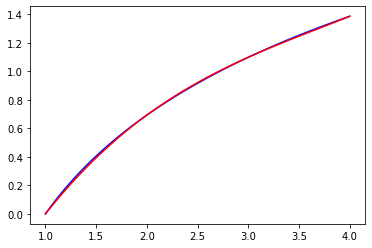

In [5]:
x = np.array((1,2,3,4))
y = np.log(x)

# get c from DivDif
c = divDif(x,y)
print(c)
# plot ln(x) and the interpolant with newton(c,x,x_eval) on the interval [1,4]
x_ev = np.linspace(1,4,100)
p = newton(c,x,x_ev)
plt.plot(x_ev, np.log(x_ev), c = 'b')
plt.plot(x_ev, p, c = 'r')

**(c)** (3 points) For $n+1$ equidistant points $[x_0,...,x_n]$ on an interval $[a,b]$ it holds that 
\begin{equation*} 
max_{s \in [a,b]} \left | \prod_{j=0}^n (s-x_j)\right | \leq \frac{n!}{4}\left (\frac{(b-a)}{n}\right )^{n+1}. 
\end{equation*}
Use this and the interpolation error bound formula to find an upper bound for the error 
\begin{equation*}
e_3 =\max_{1\leq x \leq 4} | \ln(x) - p_3(x)|. 
\end{equation*}
Also plot the error $e_3$ for the approximation in (b) over the interval $[1,4]$ and compare it with your error bound.

By definition, 
\begin{align*}
e_3 &=\max_{1\leq x \leq 4} | \ln(x) - p_3(x)|\\ 
&=\max_{t\in [1,4]} \frac{|f^{3+1}(t)|}{(3 + 1)!}\max_{s \in[1,4] }|\Pi_{j = 0}^{3}(s - x_j)|\\
&\leq \max_{t\in [1,4]} \frac{|f^{3+1}(t)|}{(3 + 1)!} \frac{3!}{4}(\frac{b - a}{3})^{3+1} \\
&= \max_{t\in [1,4]} \frac{|6x^{-4}|}{4!} \frac{3!}{4}(\frac{3}{3})^{4} \\
&= \max_{t\in [1,4]} \frac{|6x^{-4}|}{4!} \frac{3!}{4} \\
&= \max_{t\in [1,4]} |x^{-4}| \frac{3}{8} \\
&= \frac{3}{8}
\end{align*}

In [ ]:
# plot error on the interval [1,4]

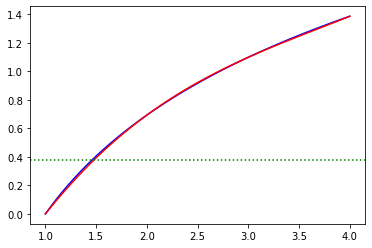

In [6]:
plt.plot(x_ev, np.log(x_ev), c = 'b')
plt.plot(x_ev, p, c = 'r')
plt.axhline(y = 0.375, c = 'g', linestyle = 'dotted')

**(d)** (2 points) Copy your code from (a) and extend it to work with repeated abscissae with derivative values as well. Assume the input to be sorted, where the derivatives are given in increasing order for each data point, e.g. input $x = [1,1,1,2,2]$, $y = [1,2,3,0.1,0.2]$ would refer to $f(1) = 1$, $f'(1) = 2$, $f''(1) = 3$, $f(2) = 0.1$, $f'(2) = 0.2$.

In [7]:
def divDifExt(x,y):
    # your code to set up the dividied difference table with repeating abscissae
     #assuming a one-to-one correspondence between the two arrays 
    divided_table = np.zeros((x.size,y.size))
    
    #Now that we have osculating data points we code so the first row corresponds to the correct f(x_i)
    l = 0
    divided_table[0][1] = None
    for k in range(1, x.size):
        if(x[k] == x[k-1]):
            divided_table[k][0] = y[l]
        else:
            l = k
            divided_table[k][0] = y[l]
             
   
    for i in range(1, x.size):
        for j in range(1, y.size):
            if (i - j < 0):
                divided_table[i][j] = None
            elif (x[i] != x[i - j]):
                divided_table[i][j] = (divided_table[i][j - 1] - divided_table[i - 1][j-1]) / (x[i] - x[i - j])
            else:
                divided_table[i][j] = y[j] / (np.math.factorial(j - 1))
                

    print(divided_table)       
    c = np.diag(divided_table, 0)
    return c # return the coefficients c from the table

### 3. Extended divided differences.

**(a)** (2 points) For some function we have the extended divided difference table of the form 

| $$i$$ | $$x_i$$ | $$f[ \cdot ]$$ | $$f[\cdot, \cdot]$$ | $$f[\cdot, \cdot, \cdot]$$ | $$f[\cdot, \cdot, \cdot, \cdot]$$
| :- | :- | :- | :- | :- | :- |
0 | 5.0 | $$f[x_0]$$ | | | 
1 | 5.0 | $$f[x_1]$$ | $$f[x_0,x_1]$$ | |
2 | 6.0 | 4.0 | 5.0 | -3.0 |
3 | 4.0 | 2.0 | $$f[x_2,x_3]$$ | $$f[x_1, x_2,x_3]$$ | $$f[x_0, x_1, x_2,x_3]$$

Fill in the unknown entries of the table:

$$f[x_0] = -1.0 $$
$$f[x_1] = -1.0$$
$$f[x_0,x_1] = 8.0 $$
$$f[x_2,x_3] = 1.0$$
$$f[x_1, x_2,x_3] = 4.0$$
$$f[x_0, x_1, x_2,x_3] = -7.0 $$

**(b)** (1 point) What is the osculating polynomial resulting from this table?  



$p(x) = -1.0 + 8.0(x - 5.0) - 3.0(x - 5.0)(x - 5.0) - 7.0(x - 5.0)(x - 5.0)(x - 6.0)  $

**(c)** (3 points) Interpolate $f(x) = ln(x)$ by passing a cubic function through $x_i = (0.1, 1, 2, 2.9)$. Evaluate the interpolant at $x=1.5$ and compare the result against the exact value and against the value of the osculating Hermite cubic through the points $x_i = (1,1,2,2)$. Explain you observation by looking at the error terms for both interpolating cubic polynomials.   
You can either use your codes from above or solve this by hand.

*your answer*

In [8]:
x_cubic = np.asarray([0.1,1,2,2.9])
y_cubic = np.log(x_cubic)

x_hermit = np.asarray([1,1,2,2])
y_hermit = np.asarray([np.log(1), 1, np.log(2), 1/2])

c_cubic = divDif(x_cubic, y_cubic)
c_hermit = divDifExt(x_hermit, y_hermit)

eval_cubic = newton(c_cubic, x_cubic, np.asarray(1.5))
eval_hermit = newton(c_hermit, x_hermit, np.asarray(1.5))
eval_actual = np.log(1.5)
print(eval_cubic)
print(eval_hermit)
print(eval_actual)

[[-2.30258509         nan  0.          0.        ]
 [ 0.          2.55842788         nan         nan]
 [ 0.69314718  0.69314718 -0.98172668         nan]
 [ 1.06471074  0.4128484  -0.14752568  0.29792893]]
[[ 0.                 nan  0.          0.        ]
 [ 0.          1.                 nan         nan]
 [ 0.69314718  0.69314718 -0.30685282         nan]
 [ 0.69314718  1.          0.30685282  0.61370564]]
[0.48773014]
[0.34657359]
0.4054651081081644


## Error terms for Hermit approximation vs Cubic approximation 

$$abs = \frac{|ln(1.5) - p_{her}(1.5)|}{ln(1.5)} = \frac{|ln(1.5) - 0.3465|}{ln(1.5)} = 0.1454$$
$$abs = \frac{|ln(1.5) - p_{cub}(1.5)|}{ln(1.5)} = \frac{|ln(1.5) - 0.4877|}{ln(1.5)} = 0.2028$$

As we can see the Hermit has approximation a better relative error than the cubic. 